## 단계 1. 라이브러리 및 데이터 불러오기

### 1-1 기본적인 라이브러리 불러오기

### 기본 패키지
- os 패키지
 + os 모듈은 운영체제와 상호작용하기 위한 함수를 제공하는 패키지
 + ex)   
   os.getcwd() : 현재 working directory 반환   
   os.chdir('경로') : '경로'에 원하는 경로를 넣으면 working directory로 변경
   
- pandas 패키지
 + 데이터 분석 시 가장 많이 쓰이는 패키지로, 표 데이터를 다루기 위한 시리즈(Series)클래스와 데이터프레임(DataFrame)클래스를 제공
 + ex)    
   pd.read_csv('파일명.csv', encoding='코드') : 파일명에 원하는 데이터의 파일명을 입력하면 해당 csv 데이터를 불러옴. 한글 포함 파일의 경우 '코드'에 'utf-8'(기본), 'cp949'(엑셀 저장, 수정 후)를 넣음   
   
- numpy 패키지
 + 과학 계산을 위한 라이브러리로, 다차원 배열을 처리하는데 여러 유용한 기능을 제공   
 + ex)   
   np.array(data) : numpy 배열 생성   
   
- matplotlib 패키지
 + 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visualization)하는 패키지
 + pyplot은 matplotlib에서 지원하는 모듈 중 하나
   * 사용 환경 인터페이스(state-machine interface)를 제공
   * pyplot의 인터페이스는 겉으로 드러나지 않으면서 자동으로 figure와 axes를 생성하며, 정의된 플롯을 얻을 수 있도록 만들어줌
   
- %matplotlib inline 
 + 플롯 결과를 notebook 문서에 저장하여 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 기능(Jupyter Notebook에서 사용)
   
   
- import package as a
 + package를 불러오고, 해당 패키지를 a라는 이름으로 사용한다는 의미

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### 1-2 LSTM을 위한 라이브러리 불러오기

- from datetime import datetime : datetime 모듈에서 datetime 클래스 불러오기 (날짜와 시각을 합한 개념인 '일시'를 나타낼 수 있음)   


- sklearn 패키지 : 데이터 과학 연산의 핵심 패키지로, 데이터 전처리, 지도 및 비지도 학습, 모델 선택, 검증, 오차 기준에 필요한 모든 기능 제공
 + preprocessing : 전처리를 위한 패키지
 + sklearn.metric - mean_squared_error : 모델 센택 및 검증, 평균제곱오차   
 
 
- keras 패키지 : 파이썬 기반 딥러닝 라이브러리로, 처음 딥러닝을 시작하는 사용자에게 편리하고 직관적인 API. Tensorflow, Theano와 같이 사용 가능   
 케라스에서는 층(layer)을 조합하여 모델(model)을 만듦. 모델은 (일반적으로) 층의 그래프. 그 중에서 가장 간단한 형태의 모델은 레이어들을 선형으로 쌓는 Sequential Model. 케라스에서는 add 함수를 사용하여 층을 쌓음.
 + Sequential : sequence of layers 네트워크를 사용하기 위한 wrapper class. compile(), fit(), evaluate()와 같은 메서드를 사용해서 Keras 모델 인터페이스를 구현하게 해줌 (Sequential은 순차적으로 레이어 층을 더해주는 순차모델이며, 만들기가 쉬움)
 + Layers : Keras의 Layer 클래스는 다양한 neural network layers를 제공해줌. fully connected layers, max pool layers, activation layers와 같은 레이어를 사용 가능, 단순히 모델의 add() 함수만을 이용하여 레이어들을 사용 가능.
 + Dense : Dense는 keras의 클래스로 nn레이어의 노드를 만듦
 + LSTM : LSTM 층을 추가하여 모델을 만들기 위해 불러오기
 + EarlyStopping : loss가 가장 적은 값에서 학습을 멈추기 위한 모듈

In [3]:
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

### 1-3 분석 데이터 불러오기

- os.chdir('path') : 경로를 지정해주는 함수   
 + path에는 데이터를 불러오거나 저장할 directory를 넣기(/ 혹은 \\\로 접근)

In [1]:
!pip install datetime
!pip install sklearn
!pip install imblearn
!pip install keras
!pip install tensorflow

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=d33d878cbc6d8452a13836fa877463847d36bf603e19eaae86216dd5a5904216
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=5fd04f0d8d22a19a9ee19f192f46adac497ae645d61046246565ebef0af3c0c2
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=8f7277c2953c6d481fde862f98f3423588210d90a94ece52e2d0012e31a208e3
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrap

In [4]:
path = "C:/Users/USER/Desktop/1216 실습파일 점검"
os.chdir(path)

df = pd.read_csv("melting_tank.csv", encoding='cp949')

> path = "C:/Users/your_path"
> os.chdir(path)

> df = pd.read_csv("melting_tank.csv", encoding="cp949")

## 단계2. 데이터 특성 파악

### 2-1 데이터 기본 구조 파악

In [5]:
df.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [7]:
df.describe()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
count,835200.000000,835200.000000,835200.000000,835200.000000,835200.000000
mean,417599.500000,509.200623,459.782865,582.962125,3.194853
std,241101.616752,128.277519,639.436413,1217.604433,0.011822
min,0.000000,308.000000,0.000000,0.000000,3.170000
25%,208799.750000,430.000000,119.000000,186.000000,3.190000
50%,417599.500000,469.000000,168.000000,383.000000,3.190000
75%,626399.250000,502.000000,218.000000,583.000000,3.200000
max,835199.000000,832.000000,1804.000000,55252.000000,3.230000


### 2-2 시간 정보 datetime 형태 변환 및 인덱스 지정

- df['DATE_TIME'] = df['DATE_TIME'].apply() 는 apply안의 형태로 데이터를 대체한다는 의미   
 + lambda x: 런타임에 생성해서 사용할 수 있는 익명 함수 (일시적인 함수로 함수가 생성된 곳에서만 필요)  
 + pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S') : x를 문자열 형태로 취급하고, 그 x를 format과 같은 형태로 변환 표시

In [8]:
df['STD_DT'] = df['STD_DT'].apply(lambda x: pd.to_datetime(str(x),
                                                        format='%Y-%m-%d %H:%M:%S'))

- df.set_index(['DATE_TIME']) : 'DATE_TIME' 열을 index로 지정 (아래 코드의 결과는 같음)
 1. df = df.set_index(['DATE_TIME'])
 2. df.set_index(['DATE_TIME'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STD_DT       835200 non-null  datetime64[ns]
 1   NUM          835200 non-null  int64         
 2   MELT_TEMP    835200 non-null  int64         
 3   MOTORSPEED   835200 non-null  int64         
 4   MELT_WEIGHT  835200 non-null  int64         
 5   INSP         835200 non-null  float64       
 6   TAG          835200 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 44.6+ MB


In [10]:
df = df.set_index(['STD_DT'])

In [11]:
df.head(20)

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,OK
2020-03-04 00:00:00,1,433,78,609,3.19,OK
2020-03-04 00:00:00,2,464,154,608,3.19,OK
2020-03-04 00:00:00,3,379,212,606,3.19,OK
2020-03-04 00:00:00,4,798,1736,604,3.21,OK
2020-03-04 00:00:00,5,743,1722,603,3.21,OK
2020-03-04 00:00:00,6,390,212,602,3.19,OK
2020-03-04 00:00:00,7,493,152,600,3.19,OK
2020-03-04 00:00:00,8,427,0,599,3.19,OK


### 2-3 histogram 및 plot 그리기

#### 관측치의 구간별 빈도 수 확인을 위하여 histogram 그리기

In [12]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']

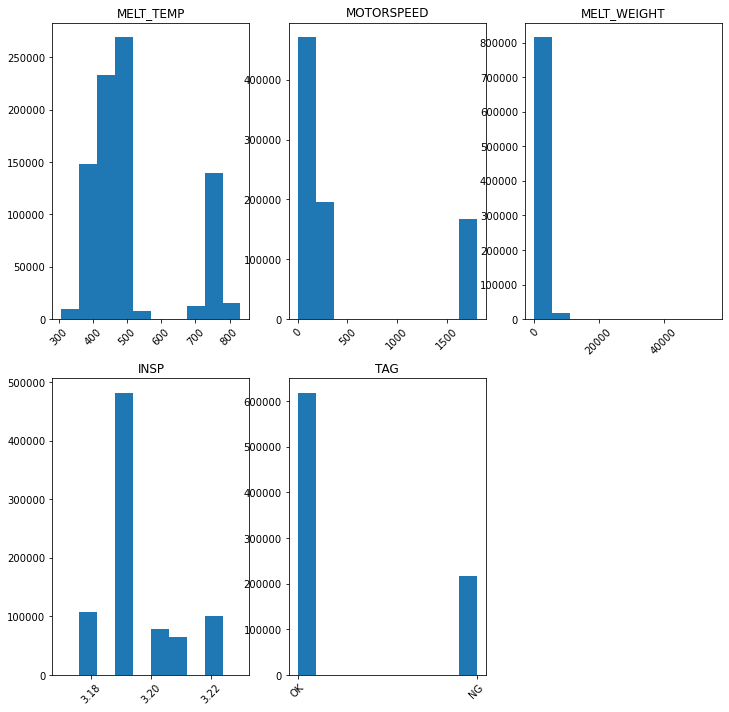

In [13]:
plt.figure(figsize=(12, 12))
for i in range(len(col_name)):
    num = 231+i
    plt.subplot(num)
    plt.hist(df[col_name[i]])
    plt.xticks(rotation=45)
    plt.title(col_name[i])
plt.show()

#### 관측치의 패턴 확인을 위한 plot 그리기

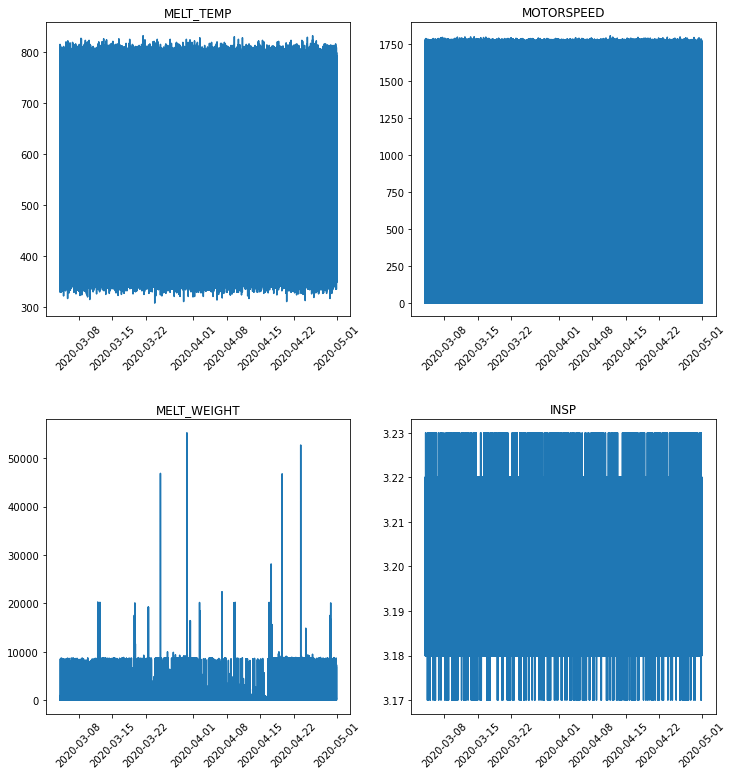

In [14]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']
plt.figure(figsize=(12, 12))
for i in range(len(col_name)):
    num = 221+i
    plt.subplot(num)
    plt.plot(df[col_name[i]])
    plt.xticks(rotation=45)
    plt.title(col_name[i])
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)  
plt.show()

- 그래프를 그린 결과 관측 값이 너무 많아 그래프의 패턴을 살펴보기 어렵다. 따라서 슬라이싱을 하여 1~100까지의 특성을 살펴본다.
- df['MELT_TEMP'][1:100]과 같이 지정해주면 'MELT_TEMP'열의 0번부터 99번까지(총 100개)의 관측치를 의미한다.
- 간격은 사용자의 임의로 바꾸어 변경하면되며, 해당 데이터에서는 각 분마다(10개의 관측치마다) 패턴을 보였으므로 해당 간격을 timestep으로 활용한다.

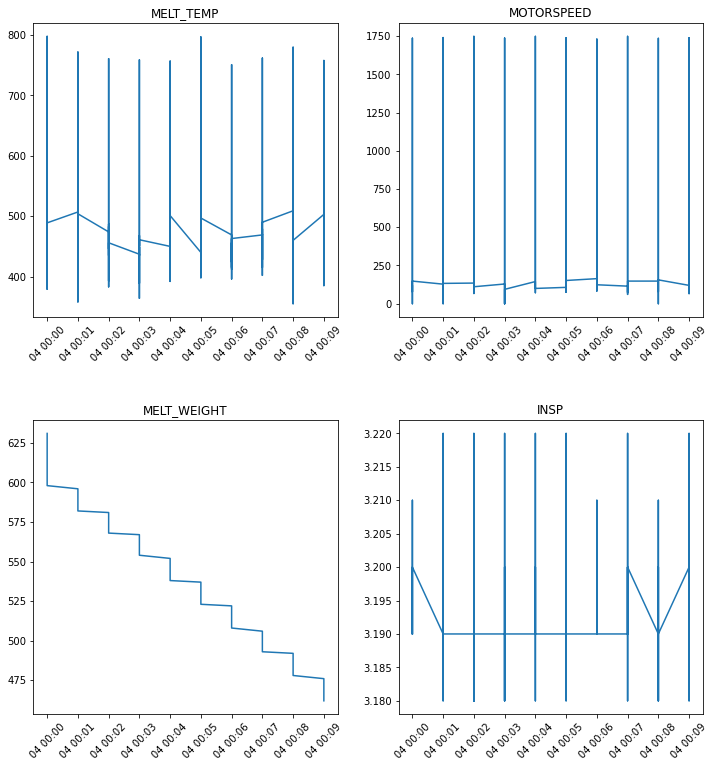

In [15]:
plt.figure(figsize=(12, 12))
for i in range(len(col_name)):
    num = 221+i
    plt.subplot(num)
    plt.plot(df[col_name[i]][0:100])
    plt.xticks(rotation=45)
    plt.title(col_name[i])
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)  
plt.show()

### 2-4. 범주형 변수를 숫자 형태로 인코딩해주는 과정

 - 종속변수인 TAG가 범주형(OK, NG) 형태로 되어있기 때문에 해당 변수를 숫자 형태로 인코딩 해주어야함
   (기계는 문자열을 인식하지 못하기 때문에 숫자 형태로 변환 필요)
 - preprocessing.LabelEncoder() 이용

In [16]:
encoder = preprocessing.LabelEncoder()
df['TAG'] = encoder.fit_transform(df['TAG'])  # 범주형 변수 숫자로 인코딩
df['TAG'] = df['TAG'].astype('float32')

In [17]:
df['TAG'].value_counts()

1.0    618821
0.0    216379
Name: TAG, dtype: int64

### 2-5. 상관 분석

In [18]:
corr = df.corr(method = 'pearson') 
corr

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
NUM,1.000000,0.000188,-0.000050,0.080079,-0.000524,0.114182
MELT_TEMP,0.000188,1.000000,0.944929,-0.000336,0.916295,0.370120
MOTORSPEED,-0.000050,0.944929,1.000000,0.000123,0.887813,0.300793
MELT_WEIGHT,0.080079,-0.000336,0.000123,1.000000,-0.000005,0.000840
INSP,-0.000524,0.916295,0.887813,-0.000005,1.000000,0.323128
TAG,0.114182,0.370120,0.300793,0.000840,0.323128,1.000000


## 단계3. 데이터 정제(전처리)

### 3-1. 분석에 활용할 칼럼 추출

- 'df’에서 실제 분석에 활용할 독립변수, 종속변수인 ‘MELT_TEMP’, ‘MOTORSPEED’, ‘TAG’칼럼만 추출하여 ‘df1’에 저장한다

In [19]:
df1 = df[['MELT_TEMP', 'MOTORSPEED', 'TAG']]

In [20]:
df1

,MELT_TEMP,MOTORSPEED,TAG
STD_DT,,,
2020-03-04 00:00:00,489,116,1.0
2020-03-04 00:00:00,433,78,1.0
2020-03-04 00:00:00,464,154,1.0
2020-03-04 00:00:00,379,212,1.0
2020-03-04 00:00:00,798,1736,1.0
...,...,...,...
2020-04-30 23:59:00,755,1743,1.0
2020-04-30 23:59:00,385,206,1.0
2020-04-30 23:59:00,465,148,1.0


## 단계4. 훈련/테스트 데이터 분리

### 4-1. 훈련/테스트 데이터 분리

- 해당 데이터에서는 데이터의 비율을 7:3으로 맞추어 활용하였으며, 특정 날짜를 timestamp로 지정하여 timestamp를 기준으로 분리를 하는 것도 가능하다.

In [21]:
split_date = int(df1.shape[0]*0.7)   # df.shape[0]*0.7 = 584640

train = df1[:split_date]
test = df1[split_date:]

In [22]:
print(train.shape)
print(test.shape)

(584640, 3)
(250560, 3)


## 단계5. 정규화

### 5-1. MinMax 정규화

- data의 scale을 맞추면 weight의 scale도 일관성 있게 나올 수 있기 때문에 정규화 과정을 거침
- 사용 방법
  1. 훈련 데이터의 분포 추정 : 훈련 데이터를 입력으로 하여 fit 함수를 실행하여 분포 모수를 객체 내에 저장   
  2. 훈련 데이터의 변환 : 훈련 데이터를 입력으로 하여 transform 함수를 싱행하여 훈련 데이터를 변환   
  3. 테스트 데이터의 변환 : 테스트 데이터를 입력으로 하여 transform 함수를 실행하여 테스트 데이터를 변환

- 훈련 데이터는 fit_transform()함수를 활용하여 분포를 추정 및 변환하며, 테스트 데이터는 transform() 함수를 활용하여 훈련 데이터로 추정된 평균과 표준 편차를 활용하여 변환

- 스케일링의 종류는 StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler가 있는데, 해당 분석에서는 MinMaxScaler 활용
  + MinMaxScaler는 0~1 사이의 값으로 정규화하는 기법

In [23]:
scaler = preprocessing.MinMaxScaler()

train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [24]:
train_sc

array([[0.34541985, 0.06430155, 1.        ],
       [0.23854962, 0.04323725, 1.        ],
       [0.29770992, 0.08536585, 1.        ],
       ...,
       [0.31679389, 0.08203991, 1.        ],
       [0.1870229 , 0.03769401, 1.        ],
       [0.32251908, 0.05820399, 1.        ]])

In [25]:
X_train_values = train_sc[:, :-1]
y_train_values = train_sc[:,-1]

### 5-2. 클래스 불균형 문제 해결(SMOTE)

In [26]:
smote = SMOTE(random_state=0)

X_train_over,y_train_over = smote.fit_sample(X_train_values,y_train_values)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train_values.shape, y_train_values.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (584640, 2) (584640,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (742408, 2) (742408,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    371204
0.0    371204
dtype: int64


## 단계6. Window 정의 및 데이터 생성

### 6-1. Window 정의 함수 생성

In [27]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

### 6-2. window 정의 함수를 활용한 데이터 생성

In [28]:
X_train_over = pd.DataFrame(X_train_over, columns=['MELT_TEMP', 'MOTORSPEED'])
y_train_over = pd.DataFrame(y_train_over, columns=['TAG'])

In [29]:
# train dataset
train_feature, train_label = make_dataset(X_train_over, y_train_over, 10)

In [30]:
test_sc = pd.DataFrame(test_sc, columns=['MELT_TEMP', 'MOTORSPEED', 'TAG'])

In [31]:
feature_cols = ['MELT_TEMP', 'MOTORSPEED']
label_cols = ['TAG']

In [32]:
test_feature = test_sc[feature_cols]
test_label = test_sc[label_cols]

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((250550, 10, 2), (250550, 1))

### 6-3. 검증 데이터(Validation data) 생성

모델의 평가를 위하여 훈련데이터를 모델 학습을 위한 훈련 데이터와 모델 검증(validation) 데이터로 나눔

In [33]:
# train, validation set 생성
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.3)

x_train.shape, x_valid.shape

((519678, 10, 2), (222720, 10, 2))

## 단계7. 모델 구축 및 훈련

### 7-1. LSTM 모델 구축

In [34]:
model = Sequential()
model.add(LSTM(50, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=False)
          )
model.add(Dense(1, activation='sigmoid'))

### 7-2. 모델 훈련

In [35]:
model_path=path

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=0, 
                             save_best_only=True, mode='auto')

In [37]:
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=50,
                    validation_data=(x_valid, y_valid)
                    ,callbacks=[early_stop, checkpoint])

Epoch 1/200
10394/10394 [==============================] - 27s 2ms/step - loss: 0.4263 - accuracy: 0.7731 - val_loss: 0.3673 - val_accuracy: 0.8274
Epoch 2/200
10394/10394 [==============================] - 24s 2ms/step - loss: 0.3698 - accuracy: 0.8255 - val_loss: 0.3671 - val_accuracy: 0.8274
Epoch 3/200
10394/10394 [==============================] - 24s 2ms/step - loss: 0.3676 - accuracy: 0.8270 - val_loss: 0.3681 - val_accuracy: 0.8274
Epoch 4/200
10394/10394 [==============================] - 24s 2ms/step - loss: 0.3672 - accuracy: 0.8273 - val_loss: 0.3672 - val_accuracy: 0.8274
Epoch 5/200
10394/10394 [==============================] - 24s 2ms/step - loss: 0.3681 - accuracy: 0.8259 - val_loss: 0.3681 - val_accuracy: 0.8274
Epoch 6/200
10394/10394 [==============================] - 24s 2ms/step - loss: 0.3684 - accuracy: 0.8259 - val_loss: 0.3670 - val_accuracy: 0.8274
Epoch 7/200
10394/10394 [==============================] - 24s 2ms/step - loss: 0.3664 - accuracy: 0.8275 - val_

### 7.3. 테스트 데이터를 활용한 예측

In [38]:
model.load_weights(filename)

pred = model.predict(test_feature)

## 단계8. 모델 평가 및 결과 해석

### 8-1. loss 변화 그래프 생성

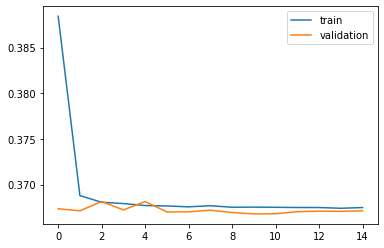

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

### 8-2. 테스트 데이터의 예측 결과 평가

In [40]:
pred_df = pd.DataFrame(pred, columns=['TAG'])

In [41]:
pred_df['TAG'] = pred_df['TAG'].apply(lambda x: 1 if x >= 0.5 else 0)

In [42]:
pred_df['TAG'].value_counts()

1    150330
0    100220
Name: TAG, dtype: int64

In [43]:
classify=confusion_matrix(test_label, pred_df)
print(classify)

[[  2276    664]
 [ 97944 149666]]


In [44]:
p = precision_score(test_label, pred_df)
print("precision: %0.4f" %p)
r = recall_score(test_label, pred_df)
print("recall: %0.4f" %r)
f1 = f1_score(test_label, pred_df)
print("f1-score: %0.4f" %f1)
acc = accuracy_score(test_label, pred_df)
print("accuracy: %0.4f" %acc)

precision: 0.9956
recall: 0.6044
f1-score: 0.7522
accuracy: 0.6064
